<h1 align="center">A Tutorial on Kernel Density Estimation and K-Nearest Neighbors Algorithm</h1> 

<h2><a id='wictt'>1. Why I chose this topic</a></h2>

<p>KDE and KNN have common origins and this link is often misunderstood in the broad sense. My intention is to elucidate the origin of the KDE and KNN and explain the intuition behind both these algorithms with examples.
</p>
<p>Before I explain KDE and KNN in detail, it is neccessary to understand what parametric and non-parametric methods are.</p>

<h2><a id='inpm'>2. Introduction to Parametric and Non-parametric Methods</a></h2>

<p>Non Parametric methods are statistical methods which make no prior assumptions about the distribution of the data. Here, statistical methods mean methods which try to test hypotheses about the data. </p>
<p>To elucidate this concept I'll demonstrate the example of a parametric method (t test) and a non parametric method(Chi-squared)</p>

<h3>Parametric Method</h3>

Let us assume a normal distribution of 1000 elements. This is a parametric distribution which has a mean and a standard deviation.

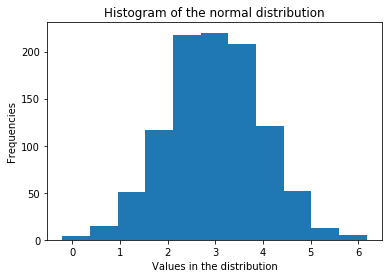

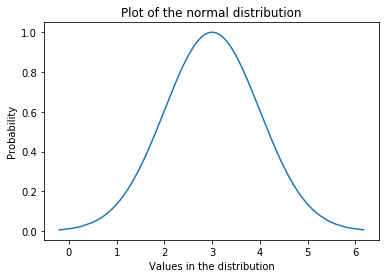

The t value is : -66.1973104742
The p value is:  0.0
Since the t value is lesser than the critical t we reject the null and say that the mean is not 5


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as onesamp
%matplotlib inline

# Define the parameters of the sample distribution
mean_mu = 3
std_sigma = 1
var_sigsq = (std_sigma)**(2)
parametric_distribution = np.random.normal(mean_mu, std_sigma, 1024)

# Choose an appropriate bin size , i have chosen 50, the rule of thumb (Sturges' Rule) for bin sizes is k = [log(n)+1]
# So in this case k = log(1024)+1 = 11
histogram_of_dist = plt.hist(parametric_distribution,11)
plt.xlabel("Values in the distribution")
plt.ylabel("Frequencies")
plt.title("Histogram of the normal distribution")
plt.show()

# Plotting the normal distribution 
sorted_parametric_x = sorted(parametric_distribution)
normal_prob_dist = []
first_part = (1/math.sqrt(2*(math.pi)*(var_sigsq)))
for x in sorted_parametric_x:
    numer = -(x - mean_mu)**(2)
    denom = 2 * var_sigsq
    second_part = math.exp(numer/denom)
    normal_prob_dist.append(second_part)
plt.plot(sorted_parametric_x,normal_prob_dist)
plt.xlabel("Values in the distribution")
plt.ylabel("Probability")
plt.title("Plot of the normal distribution")
plt.show()

# So if we want to perform a t test for population mean X = 5 (say) at 95% confidence (default of scipy), then we do the following :

significance = onesamp.ttest_1samp(sorted_parametric_x,5)

print("The t value is :",significance[0])
print("The p value is: ",significance[1] )

print ("Since the t value is lesser than the critical t we reject the null and say that the mean is not 5")


<h3>Non-Parametric Method</h3>

Here I will explain the ${\chi}^2 $ test which tests the hypotheses on a non-parametric distribution, which does not have a set mean and standard deviation. A good example of this would be a sample of 100 coin flips. Here the formula for Chi Squared test is $${\chi}^2 = \sum\limits_{i=1}^n (O_i - E_i)^2/E_i $$ Where n is the number of categories thats the data has, in our case the n is two as we are doing coin flips with two categorical outcomes.

1) There are two outcomes here heads and tails.

2) The coin is unbiased we say that we expect equal number of heads and tails, in this case 50 Heads and 50 Tails.

3) But in reality let us say we got 55 heads and 45 tails.

4) We perform a test to determine whether this was pure chance that we got this distribution or that the test was biased. Our null hypothesis in this case is that there was no significant difference between the observed data and the expected data.



In [2]:
# We have the distribution where heads = 62 and tails =38
# Expected is heads = 50 and tails = 50
import scipy.stats as cst

observations = [55,45]
expected = [50,50]

# Using the formula above our cumulative chi square value is
chi_sq = 0
for i in range(0,len(observations)):
    chi_sq += (observations[i] - expected[i])**(2)/expected[i]

print("The chi squared value is ",chi_sq," this is not statistically significant at 95% for 1 degree of freedom, and hence conclude that the test was not biased.")


The chi squared value is  1.0  this is not statistically significant at 95% for 1 degree of freedom, and hence conclude that the test was not biased.


We can see above that the non-parametric distributions are categorical and each observation is independently distributed and due to this would not have one mean or a standard deviation. For density estimation we deal with non parametric distributions.

<h2><a id='tdef'>3. The Density Estimate Formula</a></h2>

The density estimate function is a function that is measured in a D dimensional space, to understand this, let us take the example of 3D space where a point in 3D looks like: 

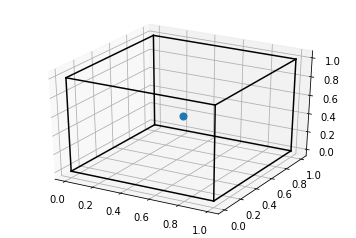

In [3]:
#https://stackoverflow.com/questions/11140163/python-matplotlib-plotting-a-3d-cube-a-sphere-and-a-vector
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

# draw cube
range_vals = [0, 1]
for s, e in combinations(np.array(list(product(range_vals,range_vals,range_vals))), 2):
    if np.sum(np.abs(s-e)) == range_vals[1]-range_vals[0]:
        ax.plot3D(*zip(s, e), color="k")

# Set point X
point = [1/2,1/2,1/2]
ax.scatter(point[0],point[1],point[2],s=50)




Let us imagine that in this cube where distance from point X to any edge is h in this case 1/2:

1) There are some finite set of points. Let us call the region that these points reside as R (the cube in the above plot).

2) The density of this function in this locality region R is $P = \int_R p(x)dx $, which translates as the probability mass of the region R, where p(x) is the mass associated with point X.

3) If the whole distribution consisted of N points, and the region R is a subset of it with K points then we would pick each point X with a probability of P.

4) Now that we have established that every point X in the whole distribution of N points has two possible outcomes P when it belongs to region R and 1-P when it belongs to a region outside R. 

5) This resembles a binomial problem, where there are two outcomes for the random variable (in our case X), where the sample space is N and our desired outcomes is K. So we can show this as a binomial distribution, we have $$bin(K|N,P) = \frac{K!}{N!(N-K)!}P^K(1-P)^{1-K}$$

6) So if we take a collection of all points in Region R the points falling in the region which can be denoted by the mean, we have $$ E[K] = \sum_{K=0}^N\frac{K!}{N!(N-K)!}P^K(1-P)^{1-K}$$
Simplifying this we have,
$$ E[K] = NP$$

7) If we want for the fraction of points that fall in the region then we divide the above equation by N to get  $  E[K/N] = P $

Similarly we can obtain the variance around the mean for the fraction of the points as follows,
$$Var[K/N] = \frac {P(1-P)}{N} $$

5) Make two critical assumptions here, one that the N is very large, two that the region R is very small as compared to the total region, which means that:

    5.1) If we assume our sample space to be large, which is often the case with real data sets, we can observe that the distribution is peaked at the mean. which means that we can assume that K/N = P which implies K= NP

    5.2) If we assume R to sufficiently small then P is would be uniform in the region R. Which means that p(x) remains uniform over region R and (2) would be repeated as P = p(x) * Volume of region R (say V). {Pg 122, Bishop}

6) Combining 5.1 and 5.2 we have,
$$ K = N (p(x)V) $$

Which translates as,
$$ p(x) = \frac{K}{NV} $$

Now this is an important formula as we now have: 

i. K which is the number of points within region R and V is the volume of the region R

This formula can be manipulated in two ways:

1) We can keep the K constant and use variable volume, this is the KNN Method.

2) We can keep the V constant and use variable K, this becomes the base for KDE.



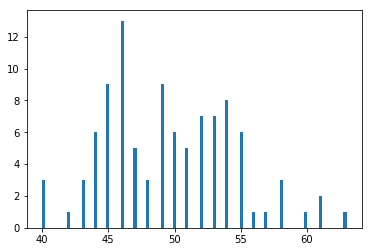

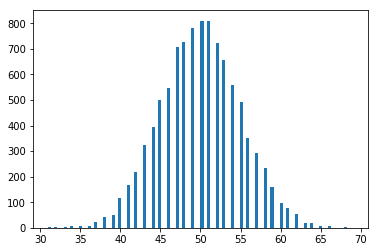

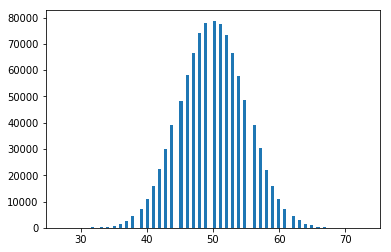

In [4]:
# Sample binomial distribution to prove step 5

for i in range(1,4):
    binom_kn_dist = np.random.binomial(100,0.5,100**i)
    plt.hist(binom_kn_dist,bins=100)
    plt.show()

<h2><a id='kde'>4. Kernel Density Estimation</a></h2>

<p> Kernel density estimation is a non-parametric method to find the probability density function of a random variable or in simple terms the way to find the probability density of the given data set at any given point. The easiest way to do this is to plot and analyze their histograms. For example :</p>

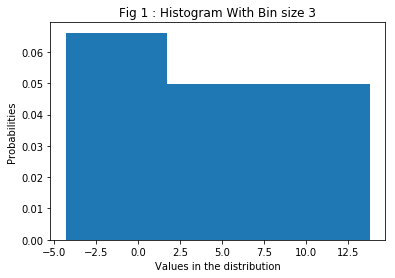

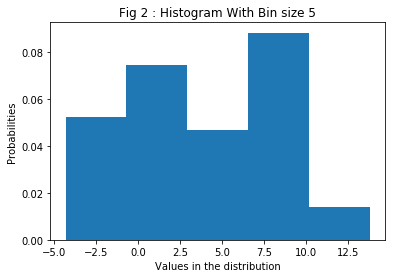

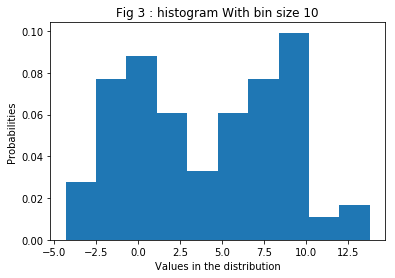

In [5]:
# Build a bimodal data set for the example with means 0 and 8 with std devs 4 and 2 respectively

dist_part_one = np.array(np.random.normal(0,2,50))
dist_part_two = np.array(np.random.normal(8,2,50))

# Merge these data sets

merged = np.concatenate((dist_part_one,dist_part_two),axis=0)

plt.hist(merged,3,normed=True) # based on Sturges rule log(N) + 1
plt.xlabel("Values in the distribution")
plt.ylabel("Probabilities")
plt.title("Fig 1 : Histogram With Bin size 3")
plt.show()

plt.hist(merged,5,normed=True) # arbitrary bin size
plt.xlabel("Values in the distribution")
plt.ylabel("Probabilities")
plt.title("Fig 2 : Histogram With Bin size 5")
plt.show()

plt.hist(merged,10,normed=True) # arbitrary bin size
plt.xlabel("Values in the distribution")
plt.ylabel("Probabilities")
plt.title("Fig 3 : histogram With bin size 10")
plt.show()


We can observe in figure 1 that for a bimodal data set with a bin size of 3 we don't get an appealing histogram. Here, we cannot identify the densities of the data due to over-smoothing. 
Similarly in figure 2, this seems to be an oversmoothed histogram representation.
In figure 3  however, we can see two distinct peaks, this bin size seems to be better  as compared to the previous two histograms.

The advantage of histograms is that we can quickly visualize and get a feel of the underlying data.
A disadvantage is that the data points are not assigned to continuous bins. Which means that if a data point which is closer to the next bin, may be represented in the current bin even though it is not so close.

A better approach would be to have kernels evaluating the probability densities with a continuously moving window. We can visualize a kernel or a window of fixed width, which slides along the data points and plots a curve based or a line based on the number of points in that window. Higher the number of point the higher the curve and vice versa.

Extending the above example we can estimate densities like:


The bandwidth that we have found is : 1.8187448586


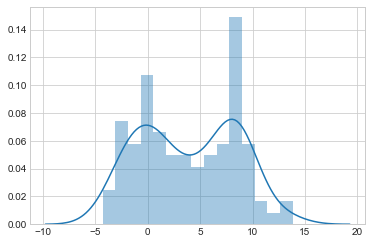

In [6]:
from scipy.stats import gaussian_kde
from scipy import stats

# using the scipy packages we estimate the bandwidth.
density_estimate = gaussian_kde(merged)
bw = density_estimate.covariance_factor()*merged.std() # method of finding the optimal bandwidth Ref : https://stackoverflow.com/questions/23630515/getting-bandwidth-used-by-scipys-gaussian-kde-function
print("The bandwidth that we have found is :",bw)

# Using the seaborn package to plot the KDE for the example dataset using the bandwidth that we found
import seaborn as sns
sns.set_style('whitegrid')
sns.distplot(merged,bins=15,kde=True,kde_kws={'bw':bw})


<h2><a id='knn'>5. K Nearest Neighbour Method for Classification</a></h2>

From the density estimate formula, if we keep the number of K points constant with a variable volume, we get a method called the K nearest neighbour algorithm.

The intuition for this algorithm is very simple. Consider a point $X$ in a D dimensional space, we start off by searching in its vicinity for $K$ nearest neighbours similar to $X$ and stop searching when we find $K$ number of points nearest to $X$. The more the number of similar points in the K points would decide the class of the point $X$.

This method is more popular as a classifier than as a density estimator, and can be used to make predictions on which class a particular point falls under. An example of this is below:


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd
import warnings

warnings.filterwarnings('ignore')


# Download the data sets

training_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

preserved_training_data = training_data
preserved_test_data = test_data

# basic feature engineering, dropping and transforming some columns 
sex_train =[]
for x in training_data['Sex']:
    if x.lower() == 'male':
        sex_train.append(1)
    else:
        sex_train.append(0)

sex_test =[]
for x in test_data['Sex']:
    if x.lower() == 'male':
        sex_test.append(1)
    else:
        sex_test.append(0)


training_data = training_data.drop(['Name','Ticket','Parch','Fare','Cabin','Sex','Embarked'],axis=1)
test_data = test_data.drop(['Name','Ticket','Parch','Fare','Cabin','Sex','Embarked'],axis=1)

training_data['Sex'] = sex_train
test_data['Sex'] = sex_test

training_data.dropna(axis=0,how='any',inplace=True)
test_data.dropna(axis=0,how='any',inplace=True)

X_train = training_data.iloc[:,training_data.columns != 'Survived']
y_train =  training_data.iloc[:,training_data.columns == 'Survived']

X_test = test_data.iloc[:,test_data.columns != 'Survived']


# Create a model
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_model.fit(X_train.loc[:,'Pclass':],y_train)

# predict on the test data
y_predicted = knn_model.predict(X_test.loc[:,'Pclass':])

# Classes predicted by the KNN classifier
print("These are the classes predicted by the classifier trained on 3 neighbors : \n",y_predicted)

# Since we dont have a y_test available from the dataset, we can delve deeper into the way the algorithm works
# Below is a simple implementation of the KNN using the Euclidean distances method with 3-Nearest Neighbours


# Take a sample point from the test data
passengerId = training_data.iloc[10].PassengerId 
print("\n\nPassenger ID of the test passenger : "  ,passengerId )
sample_test = training_data.loc[:,'Survived':][10:11]
print("\nActual indicator of survival : ",sample_test.Survived.values )
sample_test = sample_test.drop(['Survived'],axis=1)
sample_test = sample_test.as_matrix()

# Take the evaluation data set
eval_data =training_data.loc[:,'Pclass':].as_matrix()

# From the training data find the k closest elements (based on euclidean distance)

from scipy.spatial import distance
from collections import OrderedDict
distances =[]

for row in eval_data:
    temp = distance.euclidean(sample_test.flatten(),np.array(row))
    distances.append(temp)

training_data['distances'] = distances

# sort the dataframe by distances, we can see that the rows other than
training_data.sort_values(by=['distances'],inplace=True)
neighbours = training_data.head(4)
print("\n",neighbours.head())

# Majority Vote for deciding the class
neighbours = neighbours.as_matrix()
classes_votes = {}
for row in neighbours:
    if row[0] != passengerId:
        if row[1] in classes_votes:
            classes_votes[row[1]] += 1
        else:
            classes_votes[row[1]] = 1
classes_votes = OrderedDict(sorted(classes_votes.items(), key=lambda x: x[1],reverse=True))
print("\nThe class that the KNN classifier predicts is : ",classes_votes[0])



These are the classes predicted by the classifier trained on 3 neighbors : 
 [0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1
 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0
 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0]


Passenger ID of the test passenger :  12.0

Actual indicator of survival :  [1]

      PassengerId  Survived  Pclass   Age  SibSp  Sex  distances
195          196         1       1  58.0      0    0        0.0
268          269         1       1  5

In the above output it can be seen that the three closest neighbours of passenger 12 are enumerated. In those 3 , 2 passengers survived and 1 did not. So based on the majority vote, passenger 12 has also been classified as 'Survived'.

So based on this example we can get an intuition as to how the KNN works as a classifier. The essential steps in this algorithm are :

1) Identify the point X.

2) Calculate the distances from point X to the rest of the points in the data set.

3) Order the points by distance to X and pick the first K.

4) Take a majority vote, which means we find the class that occurs most.

5) Assign the class with the highest votes as the class to be predicted for point X.



<h2><a id='ikdkn'>6. Importance of KDE and KNN in Data Science</a></h2>

<h4>The Data Science/ML Pipeline</h4>

Data science problems need a structure through which they can be solved efficiently. Simply put the pipeline is:

1) Gathering and understanding the data according to the problem presented.

2) Wrangling and transforming and Visualizing the data.

3) Dimensionality reduction and feature engineering.

4) Modelling on the data.

5) Deployment.

Often it is advisable to keep iterating between step 2 ,3 and 4 to get the best model possible.

<h3> Where KDE and KNN fit in the Data Science Pipeline</h3>

Though KDE and KNN have a similar origin, they both perform better at different points in the pipepline

<h4> KDE </h4>

KDE fits in better as a visualization tool to understand the distribution that the data follows. Further action is taken based on how the KDE shows the data to be. Furthermore, KDE allows for parzen windows(like the boxcar model) and smooth Gaussian kernels which can help with visualization.

<h5> Advantages of KDE </h5>

1) The cost of computation grows linearly, which means that KDE works to evaluate the probability density efficiently for smaller data sets as the computational requirement is to just store the 'training' data. 

2) Since it does not make any assumptions about the data before hand, it is advantageous to use KDE to fit the data well.

<h5> Disadvantages of KDE </h5>

1) As mentioned earlier, this works well with relatively smaller datasets as the cost of computation increases linearly which means larger datasets would not be very efficient for KDE to compute the density estimations.

2) The kernel bandwidth is decided on the basis of the underlying data, but in case the bandwidth is large we may see that in areas of high density KDE would oversmooth and wash-out the structure that is evident, on the other hand smaller bandwidths may lead to spiky estimates. Hence having one value of bandwidth for the kernels may not be suitable for the entire data set.


<h4> KNN</h4>

Though KNN can be used for density estimation. It is much more reliable as a classifier.

<h5> Advantages of KNN</h5>

1) It is non parametric, it does not make any assumptions about the data, which means it can be applied without any prior knowledge of the underlying probability distribution of data.

2) It is simple and intuitive to understand, as presented above. If we know the value of K and the method of finding teh distances it is easy for us to predict the class of the test samples.

<h5>Disadvantages of KNN</h5>

1) The computational cost is very heavy. From the above algorithm itself we can simply calculate the time complexity to be O(n*d + n*k) where n is number of samples and d is the time required for each distance computation. Then in another loop we sort the results by distance and choose top k, of which we calculate a vote. This turns out to be heavy for large number of samples. 

2) Unless we have larger datasets, it is difficult to achieve good accuracy.

I hope that through this tutorial, the reader will get an intuition of what KDE and KNN are.


<h3>References</h3>
https://nlp.stanford.edu/IR-book/html/htmledition/time-complexity-and-optimality-of-knn-1.html

https://stats.stackexchange.com/questions/32970/advantage-of-kernel-density-estimation-over-parametric-estimation

Pattern Recognition and ML - Christopher Bishop

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/#what-is-knn

KNN KERNEL DENSITY ESTIMATION, THE CHOICE OF OPTIMAL k  - Jan Orava

StackOverflow